In [1]:
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
def calcTaxPA(grossSalaryPA):
    '''calculates tax paid per year based on 
    UK tax bands'''
    taxFreeAllowance = 12500
    if grossSalaryPA <= taxFreeAllowance:
        taxPA = 0
    elif grossSalaryPA <= 50000:
        taxPA = 0.2*(grossSalaryPA - 12500)
    elif grossSalaryPA > 50000 and grossSalaryPA <= 150000:
        taxPA = (0.4*(grossSalaryPA - 50000)) + (0.2*(50000 - 12500))
    elif grossSalaryPA > 150000:
        taxPA = (0.45*(grossSalaryPA - 150000)) + (0.4*(150000 - 50000)) + (0.2*(50000 - 12500))
    taxPA
    return taxPA


def calcNICPA(grossSalaryPA):
    '''calculates national insurance contribution per year
    based on UK bands'''
    grossSalaryPW = grossSalaryPA/52
    if grossSalaryPW >= 962:
        NICPW = 0.02*(grossSalaryPW-962) + 0.12*(962-166)
    elif grossSalaryPW > 166:
        NICPW = 0.12*(grossSalaryPW - 166)
    else:
        NICPW = 0
    return NICPW*52


def calcStudentFinPA(grossSalaryPA):
    '''calculates student finance per year'''
    grossSalaryPM = grossSalaryPA/12
    thresholdPM = 2143
    if grossSalaryPM > thresholdPM:
        StudentFinPM = 0.09*(grossSalaryPM-thresholdPM)
    else:
        StudentFinPM = 0
    return StudentFinPM*12


def calcNetSalary(grossSalaryPA):
    '''calculates net salary after tax and all other deductions'''
    netSalaryPA = grossSalaryPA - calcTaxPA(grossSalaryPA) - calcNICPA(grossSalaryPA) - calcStudentFinPA(grossSalaryPA)
    return netSalaryPA


def salaryIncrease(grossSalaryPA):
    increaseStep = np.random.normal(5000, 2000)

    return grossSalaryPA+increaseStep

def findInterestRate(paymentDate):
    year = paymentDate.year
    sdate = historicInterest[str(year)]["start"]
    edate = historicInterest[str(year)]["end"]
    delta = edate - sdate

    allDates = [sdate + timedelta(days=i) for i in range(delta.days+1)]

    if paymentDate in allDates:
#         print("yes")
        rate = historicInterest[str(year)]["rate"]
#         print(rate)
    else:
        rate = historicInterest[str(year-1)]["rate"]
#         print("next year", rate)
    return rate

def graduation_amount(myPayments):
    for i, row in myPayments.iterrows():
    #     print(row)
        rate = findInterestRate(myPayments.at[i, "Payment Date"].date())
    
def populateInterestRate(myPayments):
    myPayments["interestRate"] = 0
    myPayments["totalPayment"] = 0
    myPayments["cumulativeTotal"] = 0
    for i, row in myPayments.iterrows():
    #     print(row)
        rate = findInterestRate(myPayments.at[i, "Payment Date"].date())
#         print(rate)
        myPayments.loc[i,"interestRate"] = rate
#         print(rate+1)
        myPayments.loc[i, "totalPayment"] = myPayments.loc[i, "Gross"]*(rate+1)
        myPayments.loc[i, "cumulativeTotal"] = myPayments.loc[i, "Gross"]*(rate+1)
    return myPayments

In [3]:
def compoundInterest(P, r, n, t):
    return P*(1+(r/n))**(n*t)

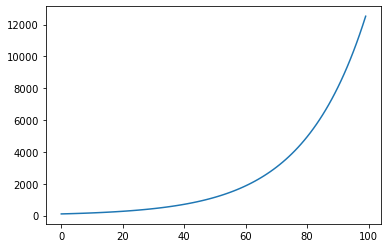

12523.929318695618


In [4]:
final = [compoundInterest(P=100, r=0.05, n=1, t=i) for i in range(100)]
plt.plot(final)
plt.show()
print(final[-1])

In [5]:
## build this dictionary from a table which is read in as a csv - potentially even scrape from the student finance website

historicInterest = {"2012": {"start": date(2012, 9, 1), "end": date(2013, 8, 31), "rate": 0.066}, 
                    "2013": {"start": date(2013, 9, 1), "end": date(2014, 8, 31), "rate": 0.063}, 
                    "2014": {"start": date(2014, 9, 1), "end": date(2015, 8, 31), "rate": 0.055}, 
                    "2015": {"start": date(2015, 9, 1), "end": date(2016, 8, 31), "rate": 0.039}, 
                    "2016": {"start": date(2016, 9, 1), "end": date(2017, 8, 31), "rate": 0.046}, 
                    "2017": {"start": date(2017, 9, 1), "end": date(2018, 8, 31), "rate": 0.0618}, 
                    "2018": {"start": date(2018, 9, 1), "end": date(2019, 8, 31), "rate": 0.063}
                   }


# incomeTax = {12500: 0.0, 50000: 0.2, 150000: 0.4, 0.45}
current_wd = os.getcwd()
file_name = "trimmed_data.csv"

def readPayments(file_name, date_header="Payment Date"):
    dataLoc = os.path.join(current_wd, "data", file_name)
    paymentsData = pd.read_csv(dataLoc)
    paymentsData[date_header] = pd.to_datetime(paymentsData[date_header])
    
    return paymentsData

In [6]:
## Read in data

myPayments = pd.read_csv("trimmed_data.csv", sep=",")
myPayments["Payment Date"] = pd.to_datetime(myPayments["Payment Date"])
myPayments

,Payment Date,Instalment,Gross
0,2014-09-25,1,1191.30
1,2014-10-15,1,2250.00
2,2015-01-05,2,1191.30
3,2015-02-04,2,2250.00
4,2015-04-20,3,1227.40
5,2015-05-06,3,4500.00
6,2015-09-24,4,1231.23
7,2015-10-21,4,2250.00
8,2016-01-04,5,1231.23
9,2016-02-03,5,2250.00


In [7]:
myPayments = populateInterestRate(myPayments)
myPayments
# graduationAmount = myPayments.sum()["totalPayment"]*1.061
# graduationplusOne = graduationAmount*1.063

,Payment Date,Instalment,Gross,interestRate,totalPayment,cumulativeTotal
0,2014-09-25,1,1191.30,0.055,1256.82150,1256.82150
1,2014-10-15,1,2250.00,0.055,2373.75000,2373.75000
2,2015-01-05,2,1191.30,0.055,1256.82150,1256.82150
3,2015-02-04,2,2250.00,0.055,2373.75000,2373.75000
4,2015-04-20,3,1227.40,0.055,1294.90700,1294.90700
5,2015-05-06,3,4500.00,0.055,4747.50000,4747.50000
6,2015-09-24,4,1231.23,0.039,1279.24797,1279.24797
7,2015-10-21,4,2250.00,0.039,2337.75000,2337.75000
8,2016-01-04,5,1231.23,0.039,1279.24797,1279.24797
9,2016-02-03,5,2250.00,0.039,2337.75000,2337.75000


In [8]:
def simulateLifetimeEarnings(grossSalaryPA, N = 40):
    lifetime_tax = 0
    lifetime_SF = 0
    lifetime_NIC = 0
    
    for i in range(N):
#         print(i)
        if i%5 == 0 and i > 0 and i < 20:
            grossSalaryPA = salaryIncrease(grossSalaryPA)
        tax = calcTaxPA(grossSalaryPA)
        lifetime_tax += tax
        NIC = calcNICPA(grossSalaryPA)
        lifetime_NIC += NIC
        SF = calcStudentFinPA(grossSalaryPA)
        lifetime_SF += SF
        print("salary: ", grossSalaryPA, ". Student finance cumulative: ", lifetime_SF)
        if i == 30:
            print("***************30 YEARS***************")
        
    print("Across {} years of earning \nat a final gross salary of {} per year \nYou paid a total of: \n{} in tax \n{} in NIC \n{} in Student Finance".format(N, grossSalaryPA, lifetime_tax, lifetime_NIC, lifetime_SF))

In [9]:
simulateLifetimeEarnings(grossSalaryPA=30000, N=45)

salary:  30000 . Student finance cumulative:  385.55999999999995
salary:  30000 . Student finance cumulative:  771.1199999999999
salary:  30000 . Student finance cumulative:  1156.6799999999998
salary:  30000 . Student finance cumulative:  1542.2399999999998
salary:  30000 . Student finance cumulative:  1927.7999999999997
salary:  33609.10852470822 . Student finance cumulative:  2638.17976722374
salary:  33609.10852470822 . Student finance cumulative:  3348.55953444748
salary:  33609.10852470822 . Student finance cumulative:  4058.93930167122
salary:  33609.10852470822 . Student finance cumulative:  4769.31906889496
salary:  33609.10852470822 . Student finance cumulative:  5479.6988361187
salary:  38071.59619720309 . Student finance cumulative:  6591.702493866977
salary:  38071.59619720309 . Student finance cumulative:  7703.706151615255
salary:  38071.59619720309 . Student finance cumulative:  8815.709809363534
salary:  38071.59619720309 . Student finance cumulative:  9927.71346711181

# To-do
* Function to calculate student finance owed - need this as separate so can calculate cumulative total over simulated years 

In [10]:
calcTaxPA(35000-(0.05*35000))/12
calcNICPA(35000-(0.05*35000))/12
calcStudentFinPA(35000-(0.05*35000))/12

56.50500000000002

In [14]:
# interest = 
principal = 1191.3

final = compoundInterest(P = principal, r = 0.055/30, n = 1, t=6)
final

1204.4645083937155

In [45]:
principal = 1191.3
for i in range(5):
    principal = principal*(1+(0.055/365))

print(principal-1191.3)

second = principal+2250
(0.055/365)*second*15

0.8978253312491233


7.780310153145975

In [40]:
(0.055/365)*1191.3+1191.3

1191.479510958904